In [88]:
import yfinance as yf

In [89]:
data=yf.download('TCS.NS',start='2022-01-01',end='2023-07-11')
data=data[['Open','High','Low','Close','Volume']]

[*********************100%***********************]  1 of 1 completed


In [90]:
print(data[:5])

Price              Open         High          Low        Close   Volume
Ticker           TCS.NS       TCS.NS       TCS.NS       TCS.NS   TCS.NS
Date                                                                   
2022-01-03  3568.864315  3645.000087  3564.105829  3633.341797  2346158
2022-01-04  3646.047010  3701.292843  3627.583946  3697.105469  2488606
2022-01-05  3678.309742  3683.068229  3628.250376  3674.455322  1733031
2022-01-06  3627.869575  3649.758610  3589.801689  3623.539307  1810293
2022-01-07  3635.482893  3678.214000  3613.022749  3667.364746  2460591


In [91]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

scaler=MinMaxScaler()
scaled_data=scaler.fit_transform(data)

In [92]:
print(scaled_data[:5])

[[0.72724592 0.78475674 0.76988411 0.79936212 0.28941247]
 [0.80514834 0.84452951 0.83519783 0.86610852 0.30918325]
 [0.83771193 0.82517825 0.83588353 0.84239885 0.20431471]
 [0.78680141 0.78980943 0.79632302 0.78910109 0.21503814]
 [0.79448572 0.82002393 0.82021557 0.83497659 0.30529497]]


In [93]:
prior_days=40
x,y=[],[]
for i in range(prior_days,len(scaled_data)):
    x.append(scaled_data[i-prior_days:i])
    y.append(scaled_data[i,3])
x,y=np.array(x),np.array(y)

In [94]:
split=int(0.70*len(x))
x_train,x_test=x[:split],x[split:]
y_train,y_test=y[:split],y[split:]

In [95]:
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout

In [96]:
model = Sequential()
model.add(LSTM(units=60,return_sequences=True,input_shape=(x.shape[1],x.shape[2])))
model.add(LSTM(units=60))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=20,batch_size=16)

D:\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 0.0819
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0152
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0104
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0080
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0076
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0075
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0068
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0056
Epoch 9/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0063
Epoch 10/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0061
Epoch 11/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0054
Epoch 12/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0051
Epoch 13/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0048
Epoch 14/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0045
Epoch 15/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0043
Epoc

In [97]:
predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(
    np.concatenate([np.zeros((predicted_prices.shape[0], 3)),
                    predicted_prices,
                    np.zeros((predicted_prices.shape[0], 1))], axis=1)
)[:, 3]


real_prices = data['Close'].values[prior_days + split:]

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 252ms/step


In [98]:
real_prices = real_prices.reshape(-1)
predicted_prices = predicted_prices.reshape(-1)

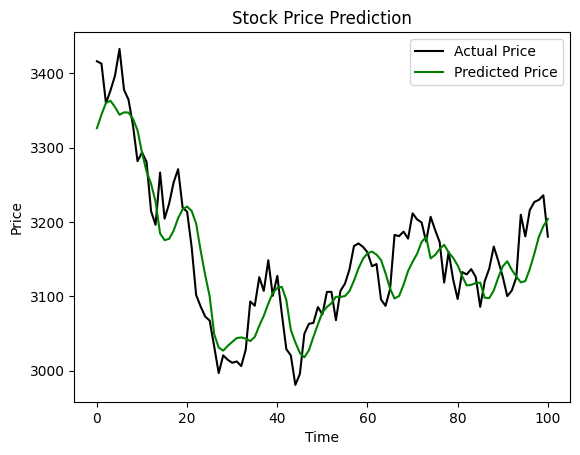

In [99]:
import matplotlib.pyplot as plt

plt.plot(real_prices, color='black', label='Actual Price')
plt.plot(predicted_prices, color='green', label='Predicted Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()